In [1]:
from modules.input_gen import generate_prompt, generate_wifi_qr_string

prompt, filename = generate_prompt()
print(prompt)
print(filename)

A QR code, cleverly embedded into a ancient ice cave, neon-lit theme, pixel art, 3D rendered
ancient_ice_cave_pixel_art_neon_lit


In [2]:
message = 'https://www.linkedin.com/in/till-zacher/'
message = generate_wifi_qr_string('Zacher', 'warwisch2')
print(message)

WIFI:S:Zacher;T:WPA;P:warwisch2;;


In [3]:
from modules.qr_code_gen import generate_qr_code, add_noise_to_qr_code

border = 10
mask_logo = 10
clean_qr = generate_qr_code(message, border=border, mask_logo=mask_logo)

center_noise_level = 1
noise_level = 0.5
border_noise_level = 1
noisy_qr = add_noise_to_qr_code(clean_qr, noise_level=noise_level, border_noise_level=border_noise_level, center_noise_level=center_noise_level, mask_logo=mask_logo)

/opt/homebrew/Caskroom/miniconda/base/envs/torch_mps_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


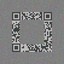

In [4]:
from modules.diffuser import resize_for_condition_image

resize_for_condition_image(noisy_qr, resolution=64)

In [5]:
from modules.diffuser import run_diffusion_on_qr_code
from modules.input_gen import generate_prompt

message = 'https://www.linkedin.com/in/till-zacher/'
prompt, filename = generate_prompt()
prompt_override = 'secret chamber inside an ice cave'
if prompt_override:
    prompt = prompt_override
    filename = prompt.replace(' ', '_')

print(f'Prompt: {prompt}')
print(f'Filename: {filename}')
border = 10
mask_logo = 4

center_noise_level = 0.6
noise_level = 0.6
border_noise_level = 0.3

model_id = 'models/animerge_v23'
resolution = 512
seed = 384

invert_colors = True
guidance_scale = 7
controlnet_conditioning_scale=1.2
strength=0.9
num_inference_steps=100
verbose=True

run_diffusion_on_qr_code(
    message,
    prompt,
    filename,
    border=border,
    mask_logo=mask_logo,
    center_noise_level=center_noise_level,
    noise_level=noise_level,
    border_noise_level=border_noise_level,
    model_id=model_id,
    resolution=resolution,
    num_inference_steps=num_inference_steps,
    seed=seed,
    invert_colors=invert_colors,
    guidance_scale=guidance_scale,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    strength=strength,
    verbose=verbose
)

Prompt: secret chamber inside an ice cave
Filename: secret_chamber_inside_an_ice_cave
Running qr code diffusion with prompt: secret chamber inside an ice cave
Using MPS device


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]An error occurred while trying to fetch models/animerge_v23/vae: Error no file named diffusion_pytorch_model.safetensors found in directory models/animerge_v23/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch models/animerge_v23/unet: Error no file named diffusion_pytorch_model.safetensors found in directory models/animerge_v23/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...:  50%|█████     | 3/6 [00:00<00:00,  6.96it/s]/opt/homebrew/Caskroom/miniconda/base/envs/torch_mps_env/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...: 100%

Inverted colors of the images


  8%|▊         | 7/90 [00:12<02:27,  1.78s/it]


KeyboardInterrupt: 